##  CREDIT CARD DEFAULT PREDICTION

### Introduction

##### In the financial sector, predicting credit card default is a critical task for banks and lending institutions as it helps mitigate the risk of loan defaults and ensures financial stability. Credit card default occurs when a borrower fails to make the required minimum payment on their credit card balance, leading to significant financial losses for the issuing bank. Given the growing number of credit card holders and the inherent complexity of human financial behavior, predicting defaults based on historical data requires advanced techniques in data science and machine learning (ML).

This project focuses on developing a machine learning model to predict the likelihood of a credit card client defaulting on their payments. The dataset used for this project consists of several features such as age, income, credit limit, payment history, and previous credit card defaults, among others. These features provide valuable insights into a client’s financial behavior and can serve as critical indicators of potential default risk. By analyzing the patterns in these features, the project aims to create an accurate model that can predict whether a client is likely to default on their credit card payments.


##### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
###### LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
###### SEX: Gender (1 = male; 2 = female).
###### EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
###### MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
###### AGE: Age (year).
###### PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
###### BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.
###### PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

This project aims to predict credit card default using machine learning techniques. It begins with essential data preprocessing steps, including handling missing values, detecting outliers and applying numerical scaling to standardize features. After preprocessing, few machine learning models like Logistic Regression, Random Forest, and Support Vector Machines (SVM), KNN,etc. are to be used to build predictive models, which are to be then evaluated using several metrics. The project demonstrates how machine learning can be leveraged to assist financial institutions in reducing credit risk and making informed decisions about credit approvals.


### Import necessary libraries


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import seaborn as sns

### Load dataset

In [64]:
df = pd.read_csv("C:\\Users\\neenu\\Jupyter\\Assignments\\Final_Project\\Default_of_Credit_Card_Clients\\default_of_credit_card_clients.csv")
print(df)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

### Summary of data frame's structure

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### Displays the first 5 rows of the DataFrame by default

In [66]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Displays the last 5 rows of the DataFrame by default

In [67]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [68]:
df.shape

(30000, 25)

### Summary statistics of the numerical columns in a DataFrame.

In [69]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### List of columns in the dataset

In [70]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Checking whether the dataset contains any null values

In [71]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Checking whether the dataset contains any duplicate values

In [72]:
df.duplicated().sum()

0

### Check for missing values and handle them

In [73]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


There are no missing values.

In [74]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

## **DATA VISUALIZATION**

Text(0.5, 1.0, 'Default Count')

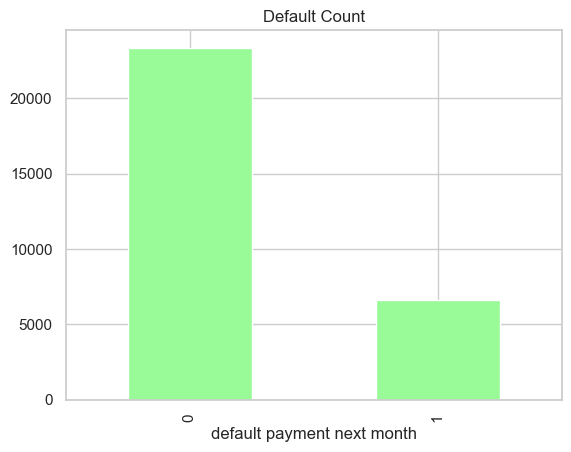

In [75]:
df['default payment next month'].value_counts().plot.bar(color='palegreen') # default payment (Yes = 1, No = 0)
plt.title('Default Count')

The above bar graph indicates that the number of non defaulters are higher than that of defaulters.

In [76]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

Text(0.5, 1.0, 'Education')

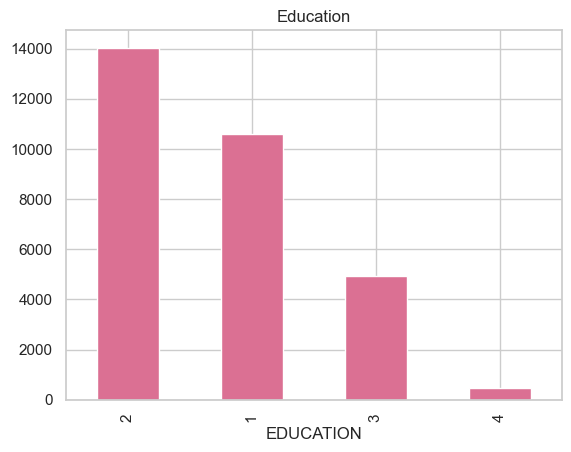

In [77]:
df['EDUCATION'].value_counts().plot.bar(color='palevioletred')
plt.title('Education')
#1=graduate school,2=university,3=high school,4=others

The above bar graph indicates a high level of educational attainment, with most of the credit card clients having completed university or graduate school.


In [78]:
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

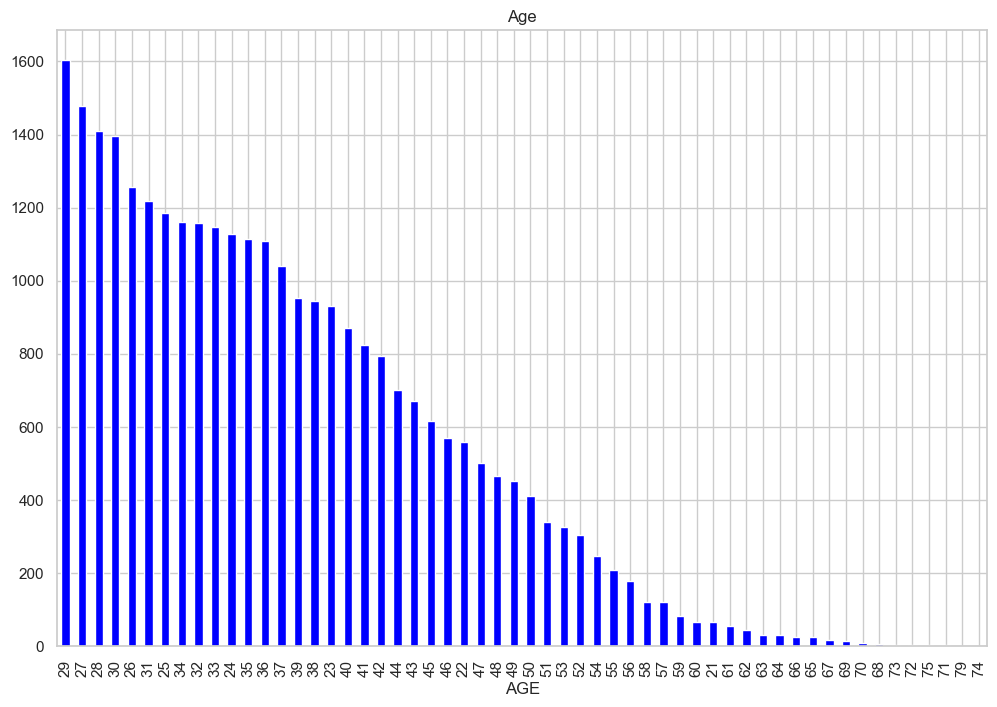

In [79]:
plt.figure(figsize=(12,8))
df['AGE'].value_counts().plot.bar(color='blue')
plt.title('Age')
plt.show()

The bar graph suggests that younger adults, mostly, individuals of 29 years old dominate the credit card client base, with numbers declining as age increases.

Text(0.5, 1.0, 'Age-wise Distribution of Default Payment Predictions for Next Month')

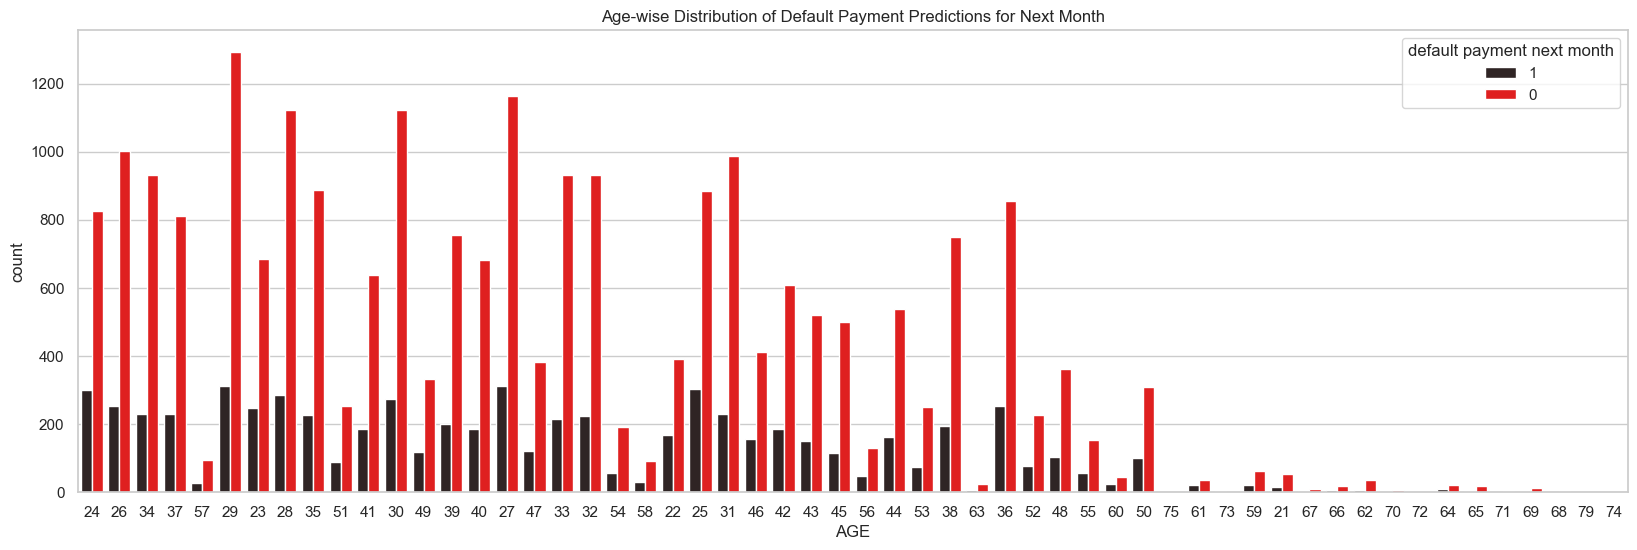

In [109]:
df['default payment next month'] = df['default payment next month'].astype(str)
df['AGE'] = df['AGE'].astype(str)
plt.figure(figsize=(20, 6))

sns.countplot(data=df,x = df['AGE'],hue =df['default payment next month'],palette='dark:red')
plt.title('Age-wise Distribution of Default Payment Predictions for Next Month')

From the above count plot:


*   The majority of individuals, particularly in younger age groups, are not expected to default on their payments.
*   Also, there is a notable decrease in count as the age increases,indicating fewer defaults among older age groups.





In [81]:
df['LIMIT_BAL'].value_counts()

LIMIT_BAL
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64

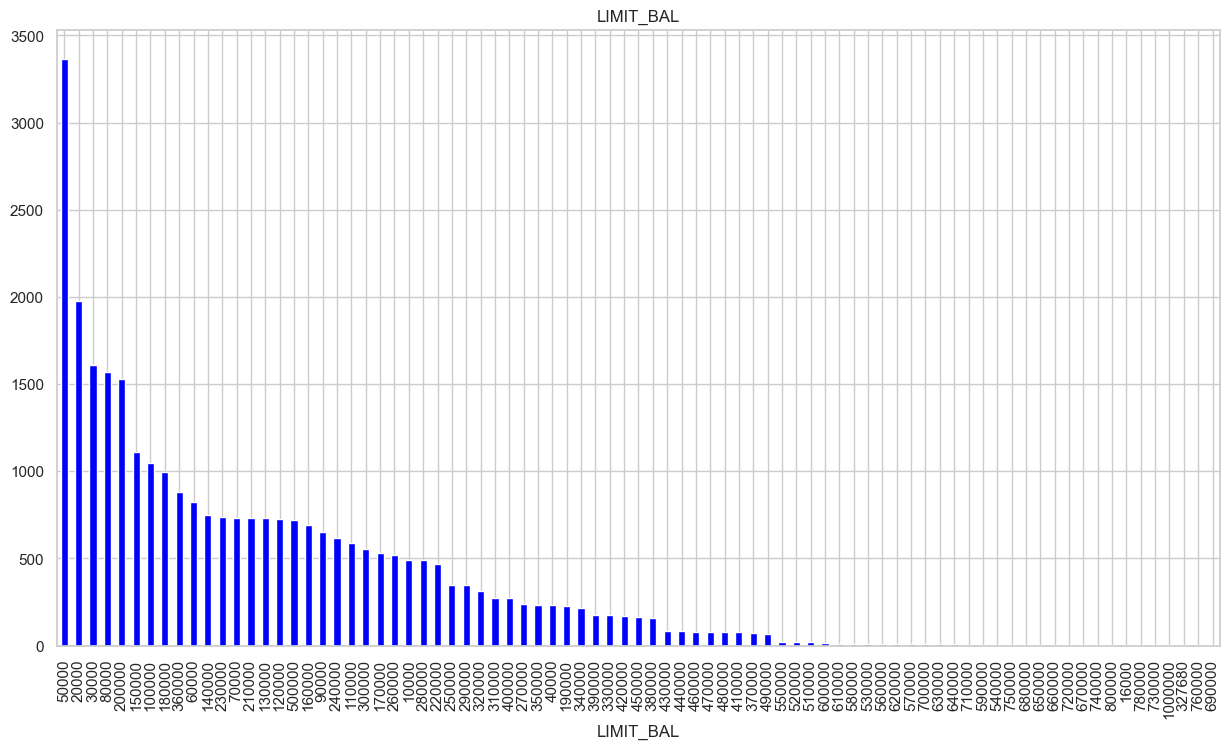

In [102]:
plt.figure(figsize=(15,8))
df['LIMIT_BAL'].value_counts().plot.bar(color='blue')
plt.title('LIMIT_BAL')
plt.show()

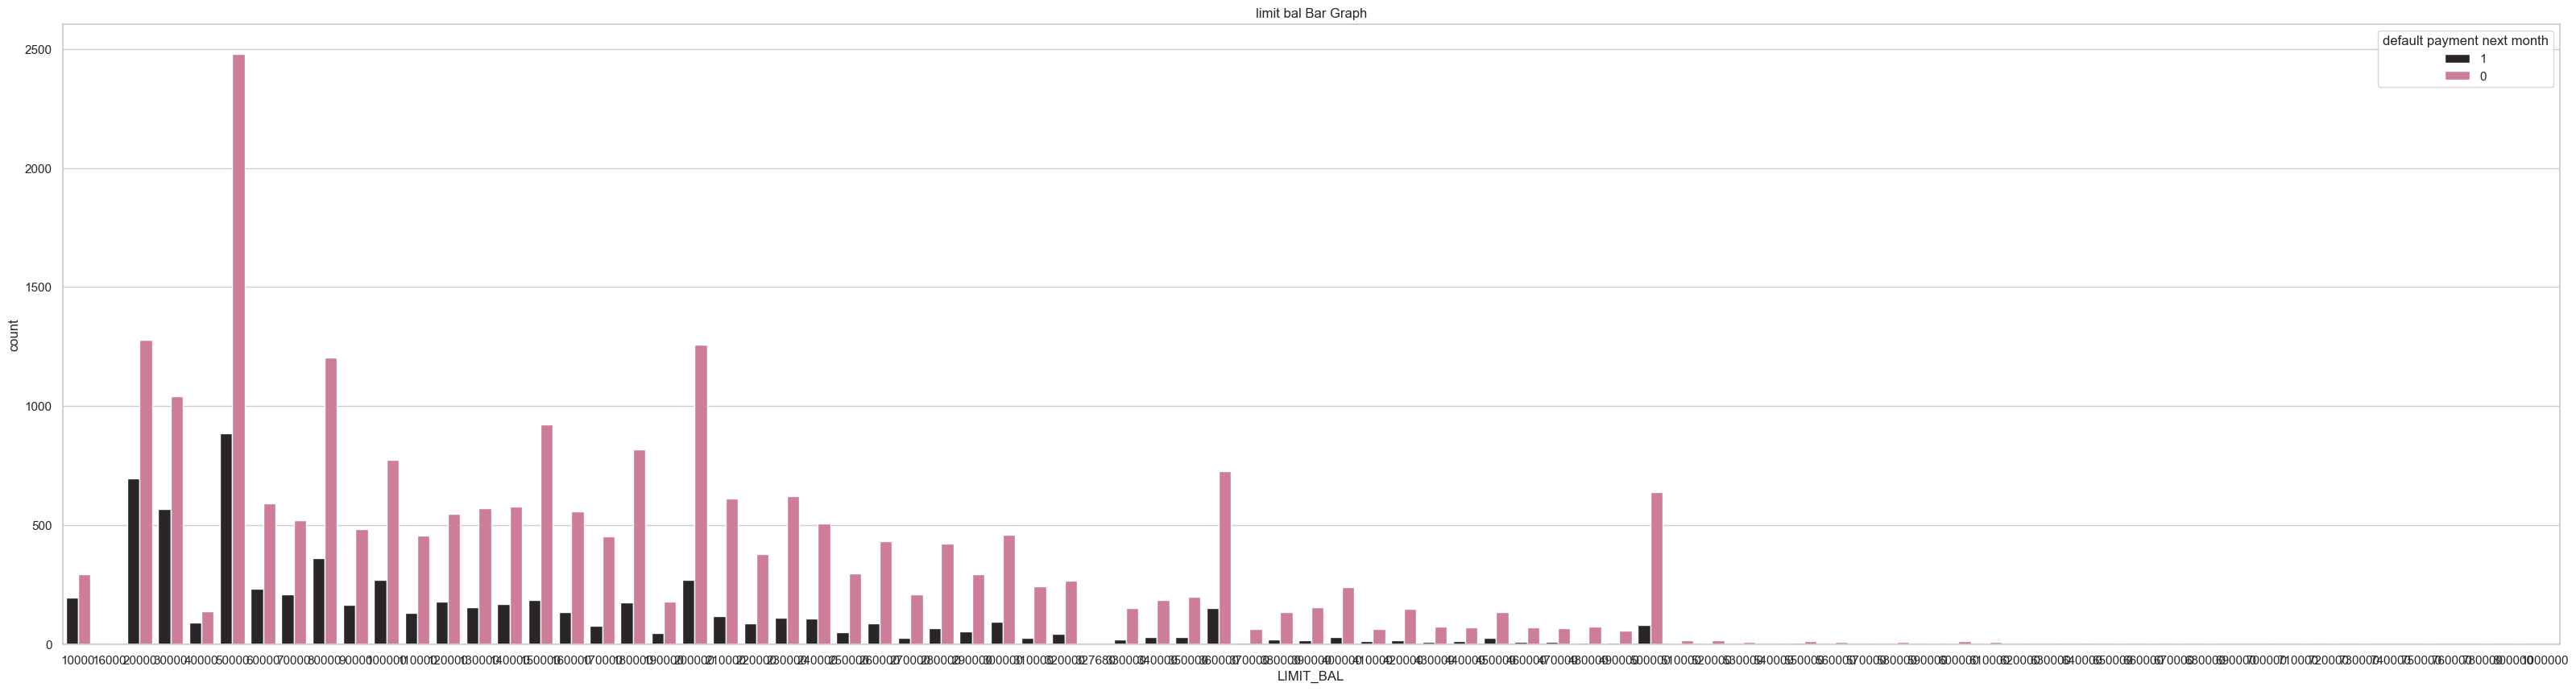

In [111]:
#f['LIMIT_BAL'] = df['LIMIT_BAL'].astype(str)
df['default payment next month'] = df['default payment next month'].astype(str)
plt.figure(figsize=(40, 10))
sns.countplot(data=df,x = 'LIMIT_BAL',hue ='default payment next month',palette='dark:palevioletred')
plt.title('limit bal Bar Graph')
plt.show()

Analyzing the distribution of credit limit(LIMIT_BAL) in relation to default behavior helps in understanding how the available credit might relate to the likelihood of default.
The graph indicates that customers with lower credit limits are more common and show a higher count of both default and non-default instances, suggesting a potential link between lower credit limits and increased default risk, though most customers in this group still successfully meet their payments.

In [83]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender')

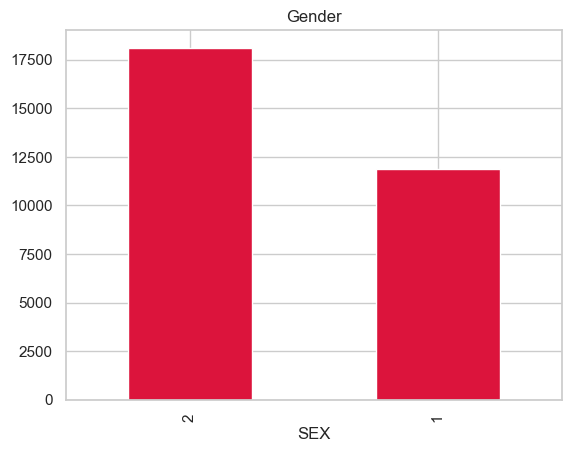

In [84]:
df['SEX'].value_counts().plot.bar(color='crimson')  # Gender (1 = male; 2 = female).
plt.title('Gender')

The bar chart shows the distribution of gender among credit card clients, where category 1 represents males and category 2 represents females.This suggests that female customers make up the majority of the credit card client base in this data.

In [85]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

Text(0.5, 1.0, 'Marital status ')

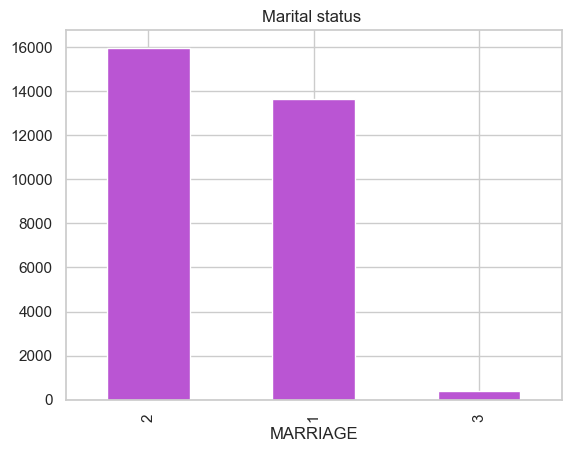

In [86]:
df['MARRIAGE'].value_counts().plot.bar(color='mediumorchid')  # Marital status (1 = married; 2 = single; 3 = others).
plt.title('Marital status ')

Based on the marital status distribution of credit card holders, it appears that a significant portion of them are married, followed by singles and a smaller group falling under other marital statuses. This trend suggests that credit card ownership may be more common among individuals with stable, committed lifestyles, possibly due to financial responsibilities associated with marriage.

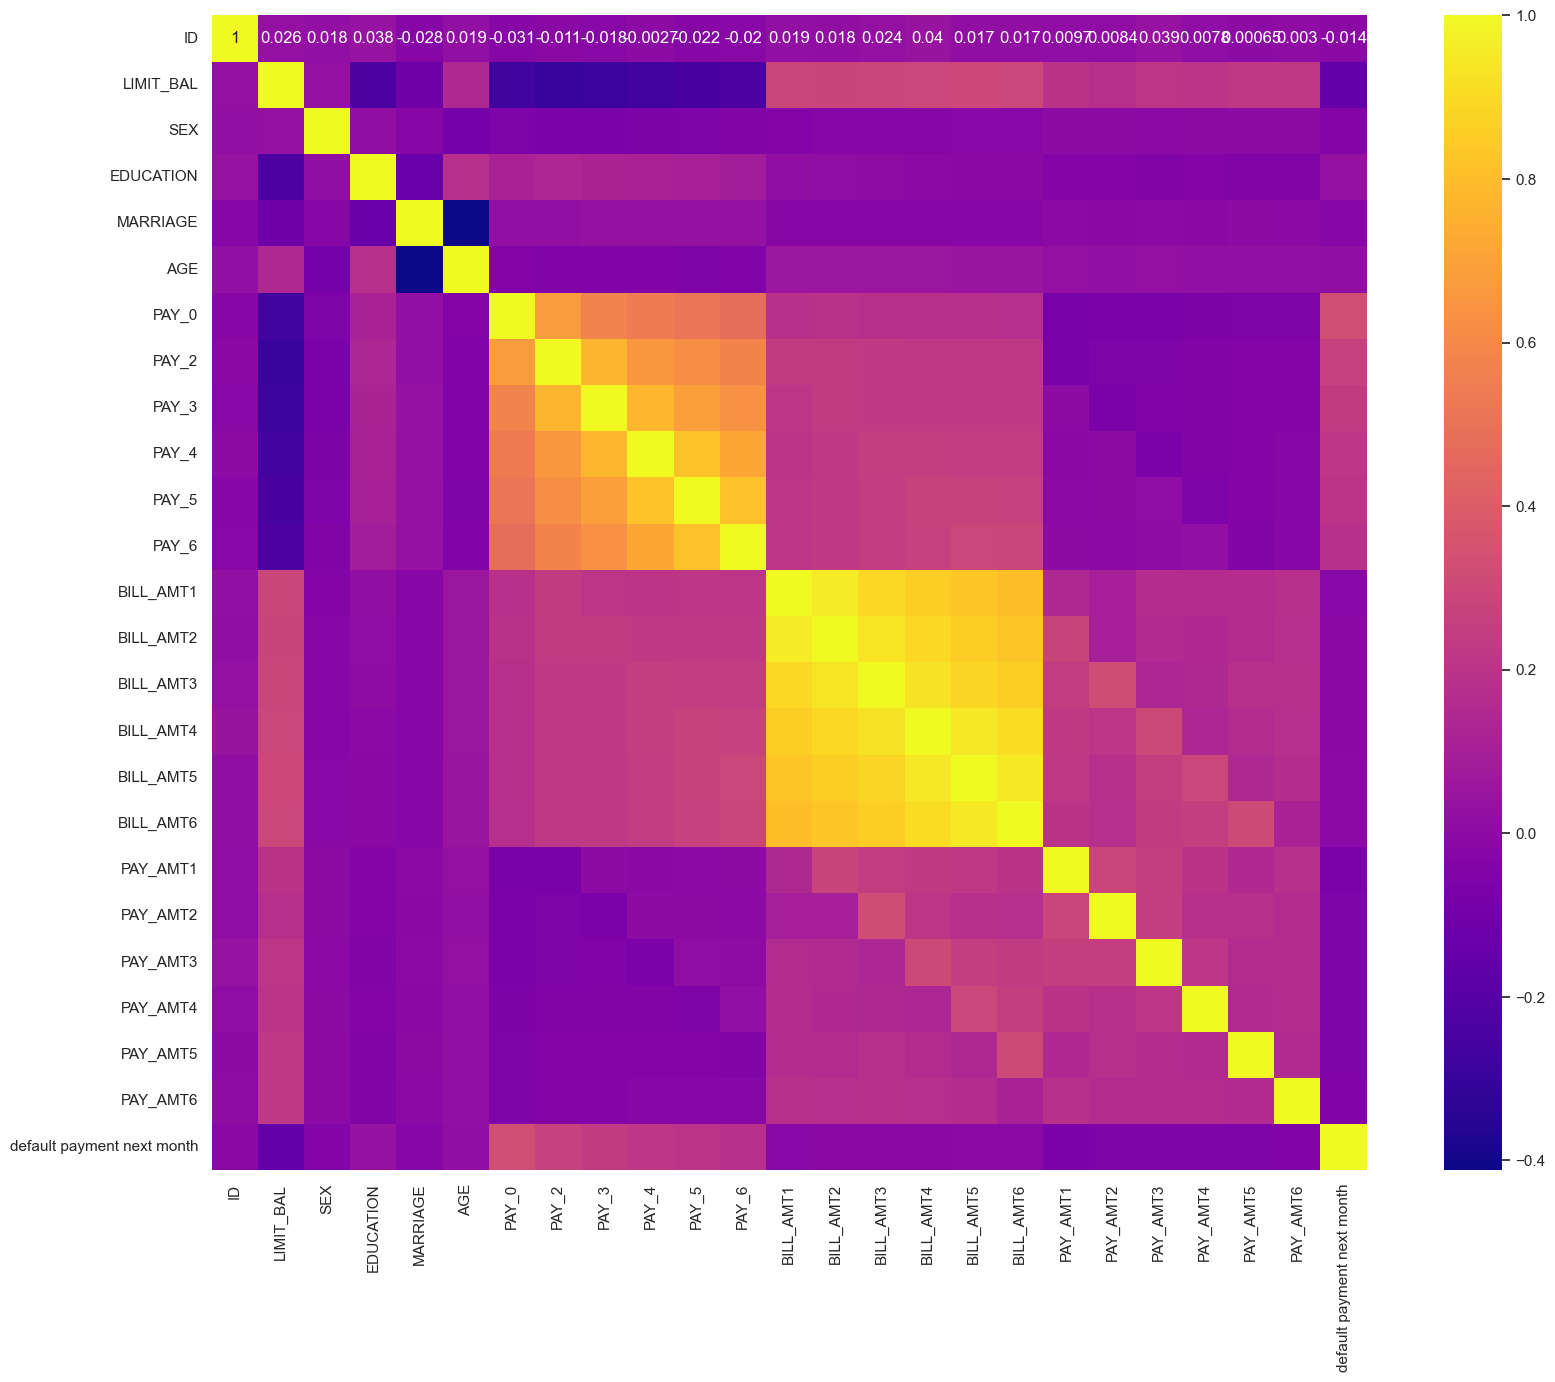

In [88]:
corrmat = df.corr() #finding the correlation
# Draw the heatmap
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, annot=True, square=True, cmap='plasma')
plt.show()

The heatmap analysis shows that recent payment behavior, especially recent delays (PAY_0 and PAY_2), is the strongest predictor of credit card default next month. This suggests that recent payment history plays a crucial role in assessing default risk. Demographic factors such as age, sex, education, and marital status have minimal impact, indicating they are weak predictors on their own. Consistent billing amounts across months reflect stable spending but don’t strongly predict default, while credit limit also has limited predictive power. Overall, focusing on recent payment patterns provides the most valuable insights for predicting credit card default.

### Outlier Detection

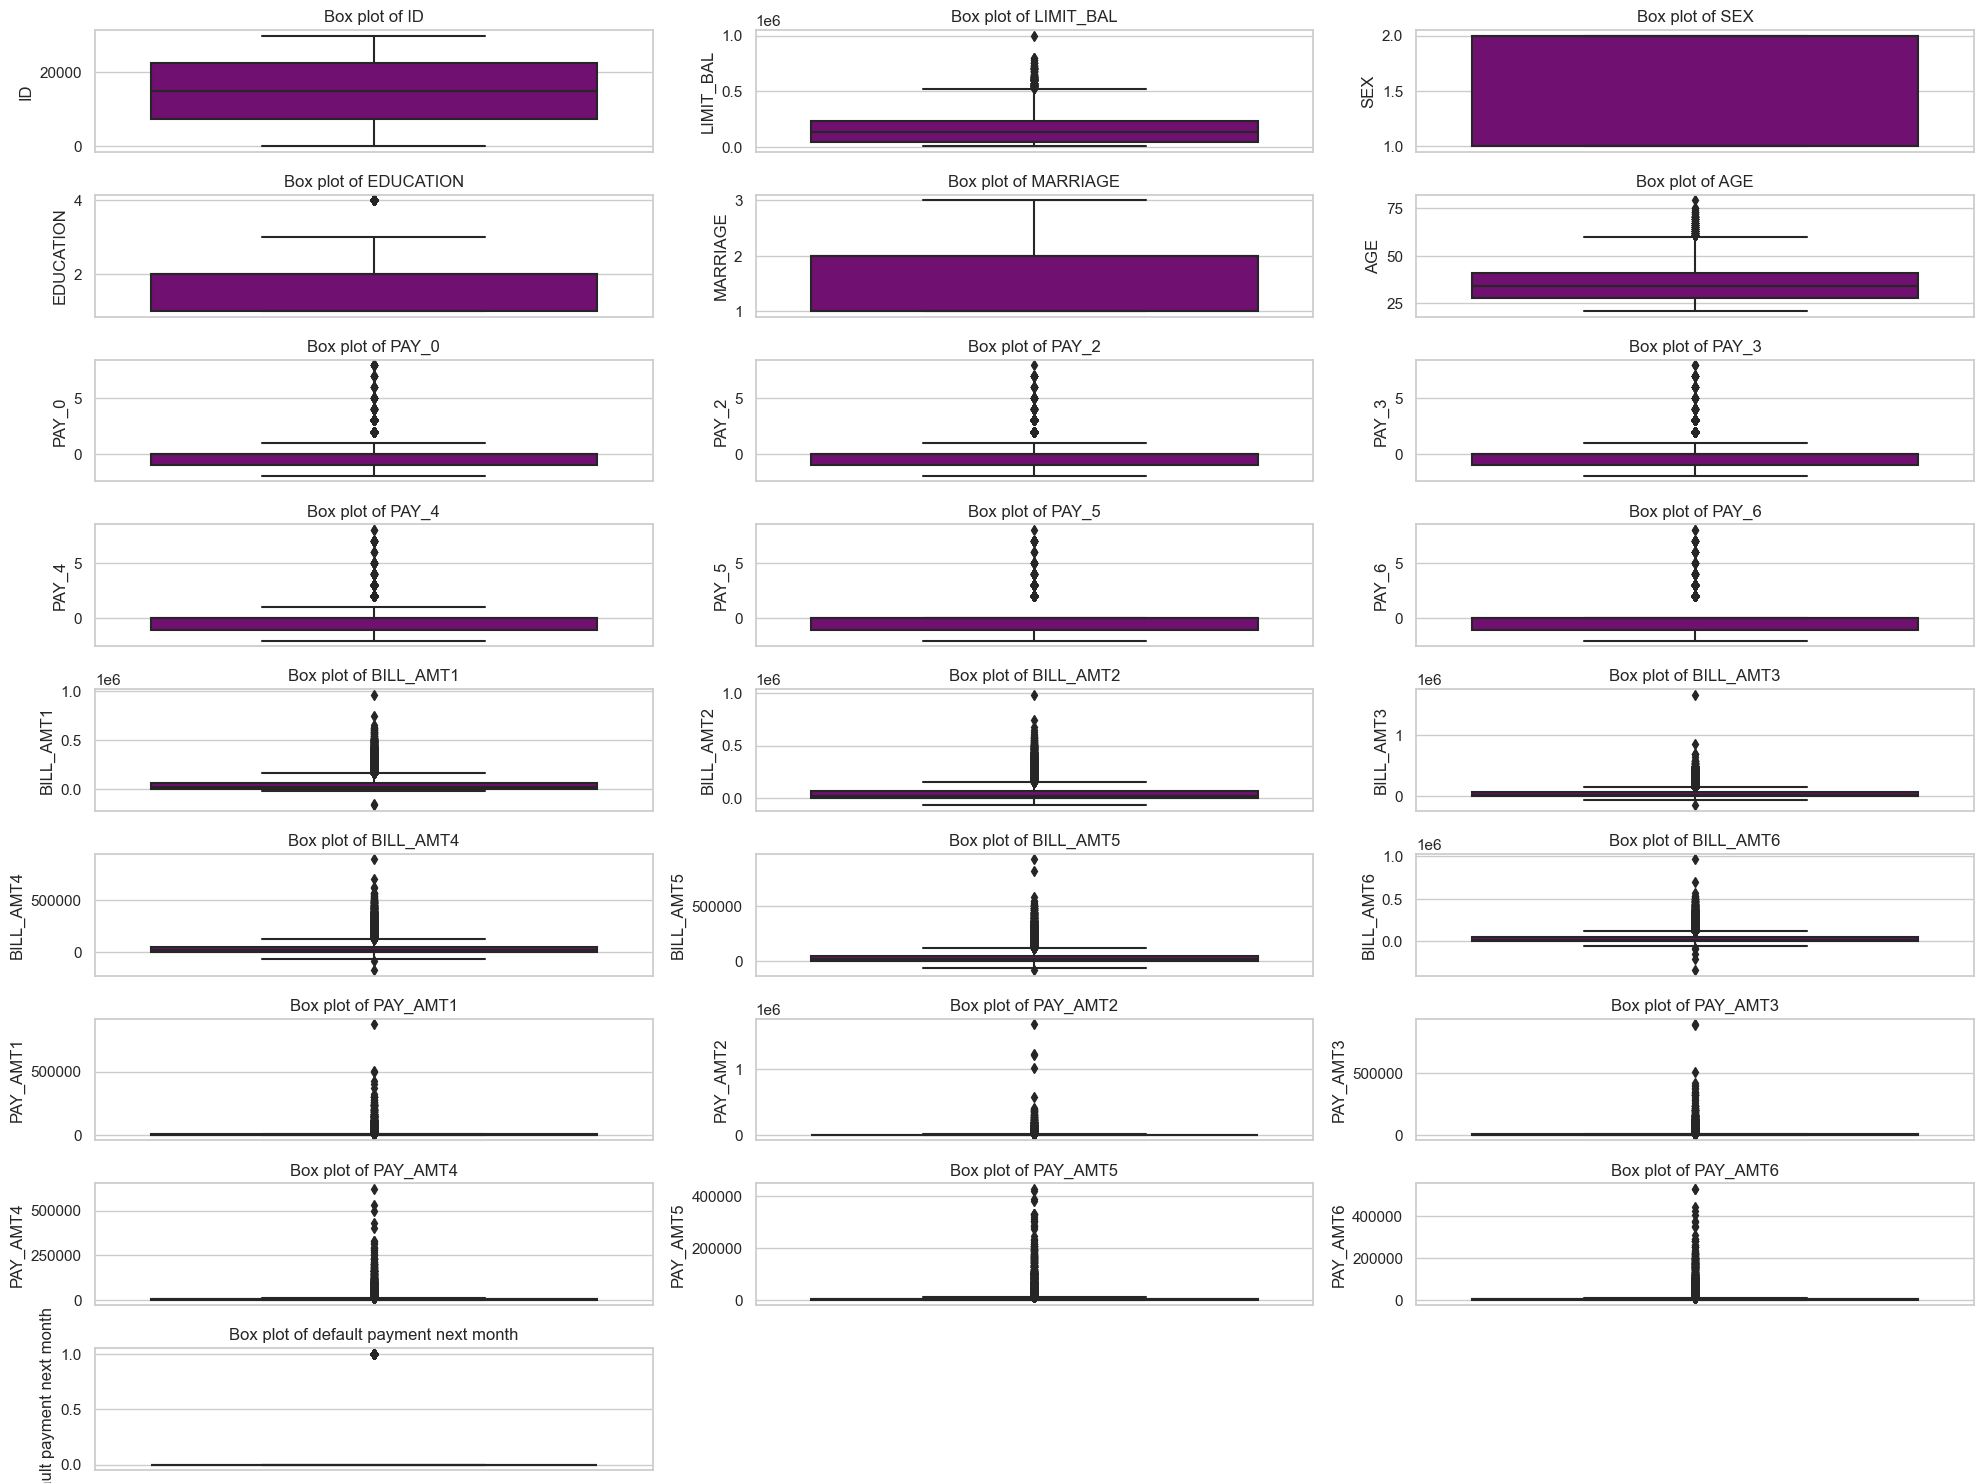

In [87]:
# Set Seaborn style
sns.set(style="whitegrid")

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

# Create a large figure to hold all the plots
plt.figure(figsize=(20, 15))

# Loop through each numerical column to create a boxplot
for i, col in enumerate(numerical_columns, 1):
    # Calculate rows and columns dynamically based on the number of plots
    plt.subplot((len(numerical_columns) // 3) + 1, 3, i)
    sns.boxplot(y=df[col], color="purple")
    plt.title(f'Box plot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Based on the box plots for the numerical features, we can identify several outliers that deviate significantly from the rest of the data.


1. LIMIT_BAL: These outliers represent individuals with exceptionally high credit limits compared to the majority of the dataset.

2. AGE: The AGE feature shows a tight concentration around the lower to middle age ranges, but there are a few points at the higher end that stand out as outliers. These individuals could be older adults who have credit accounts, but the small number of such cases may suggest that they are less common, and may need to be treated separately in modeling.

3. BILL_AMT1, BILL_AMT2, BILL_AMT3, etc. (Bill Amounts): The bill amounts  reveal significant outliers, especially on the upper end. These could be instances where certain customers have unusually large bills in comparison to the rest of the population.

4. PAY_AMT1, PAY_AMT2, PAY_AMT3, etc. (Payment Amounts): Similarly to the bill
amounts, the payment amounts also show several outliers, particularly those that fall outside the expected range of most payments. Large payments made by a small subset of customers could indicate financial behavior anomalies or could be indicative of one-time adjustments to the payment history.

5. PAY_0, PAY_2, PAY_3, etc. (Payment Status): The payment status features  also display outliers, though these are typically binary or categorical values indicating whether a payment was delayed.


In [ ]:
df.info()

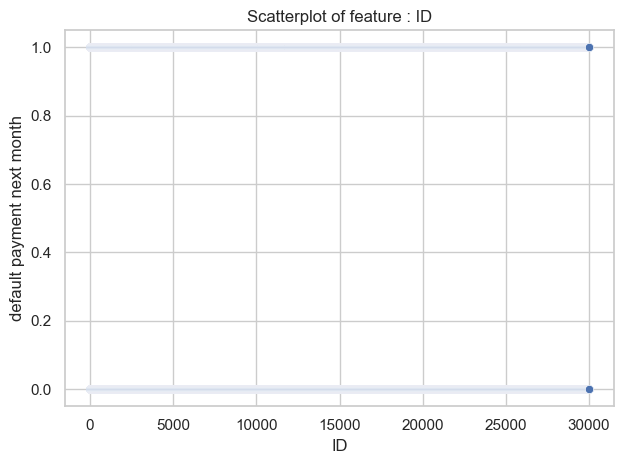

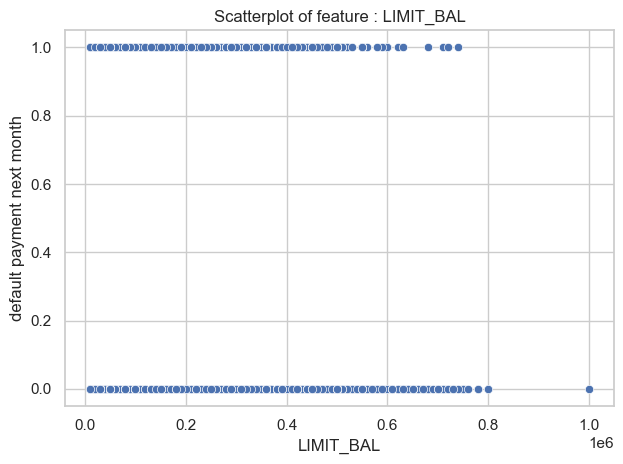

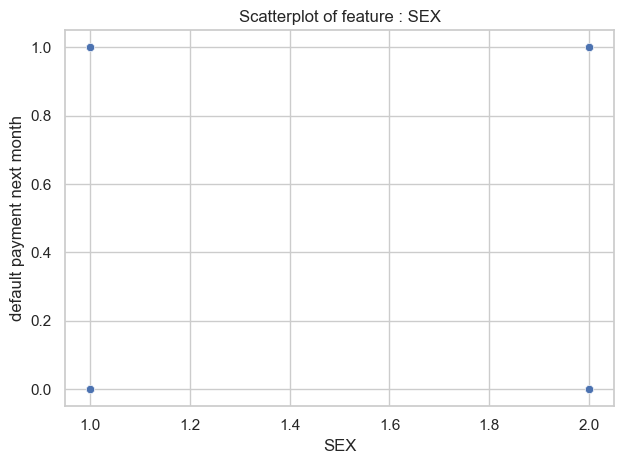

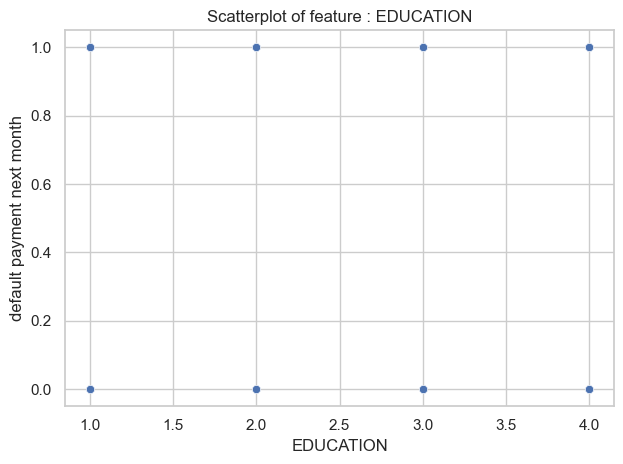

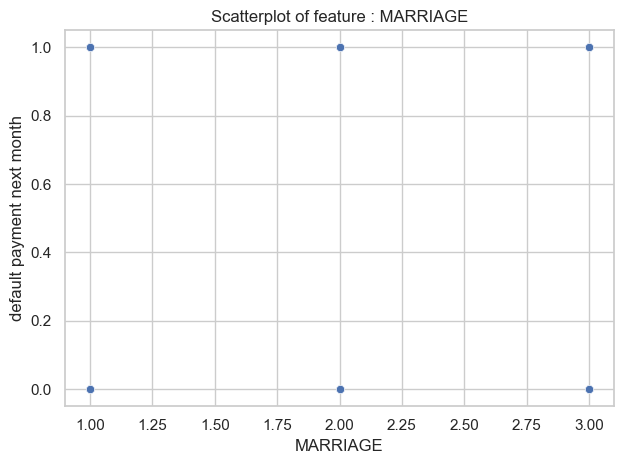

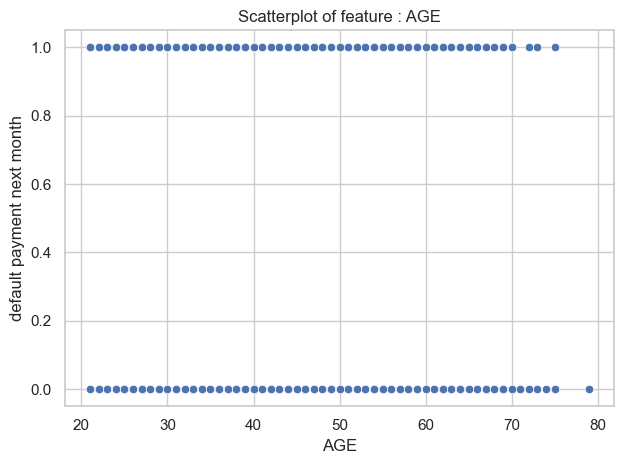

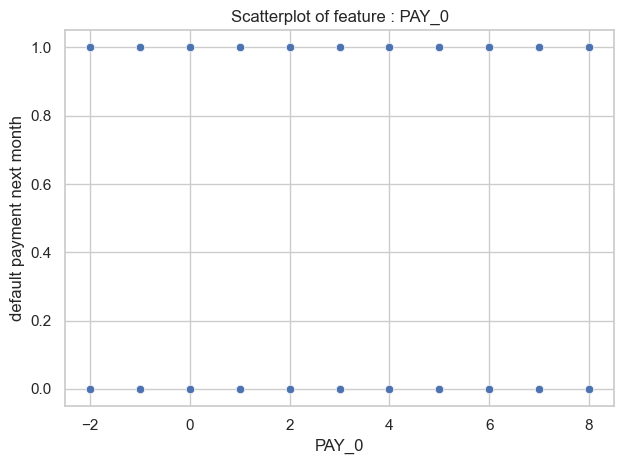

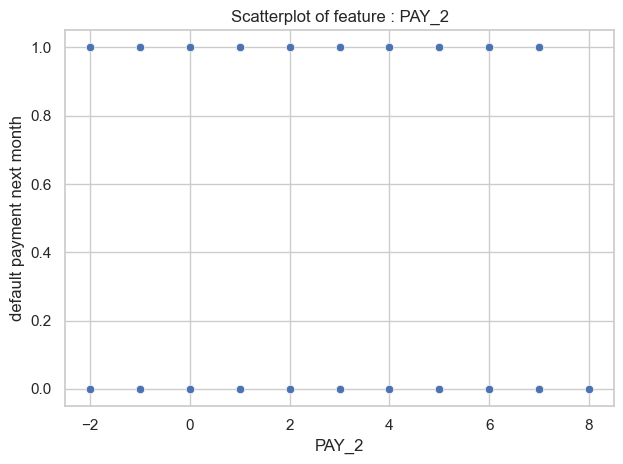

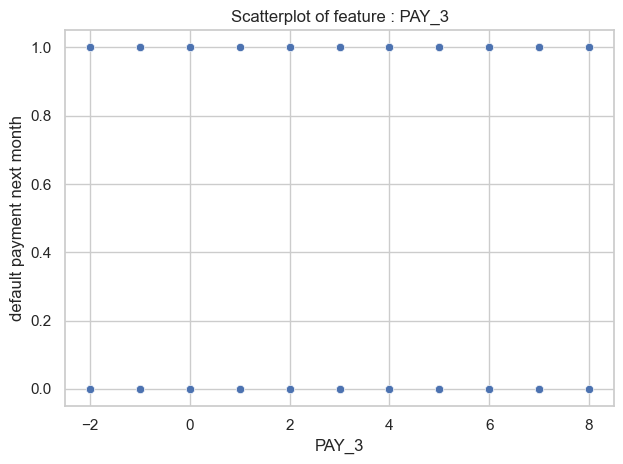

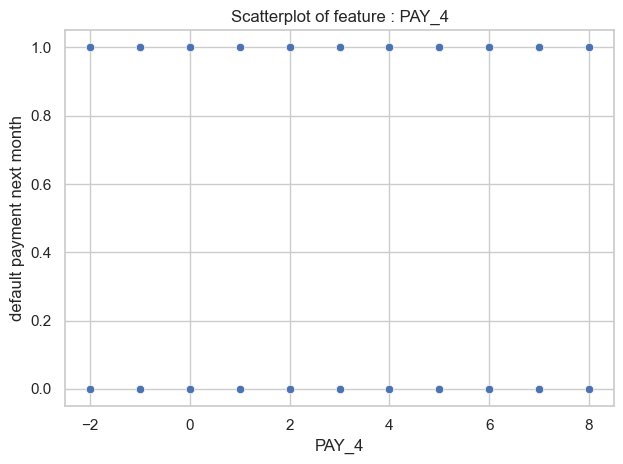

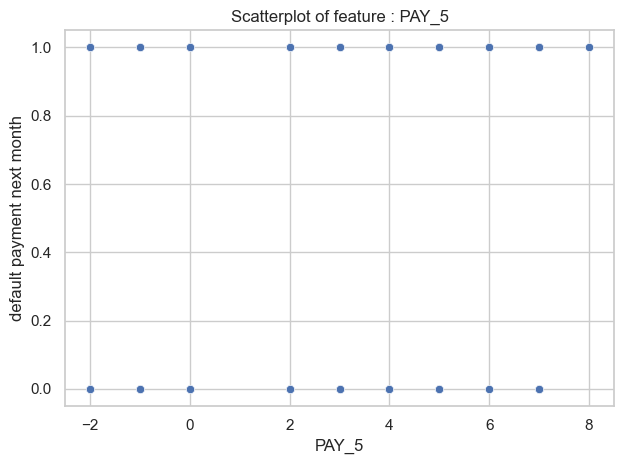

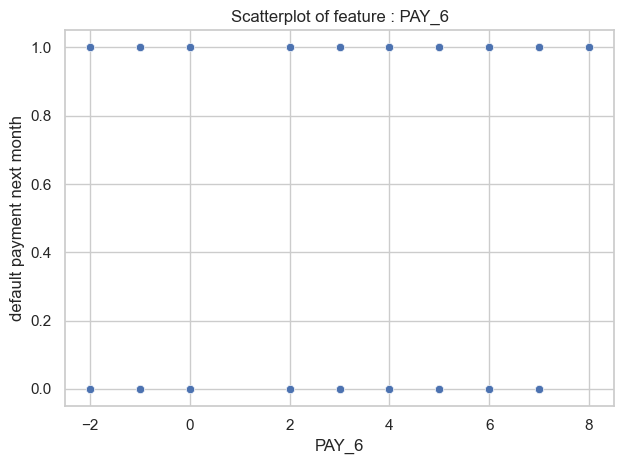

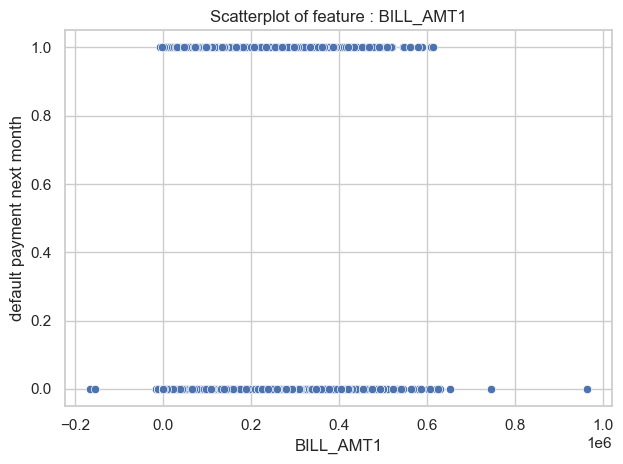

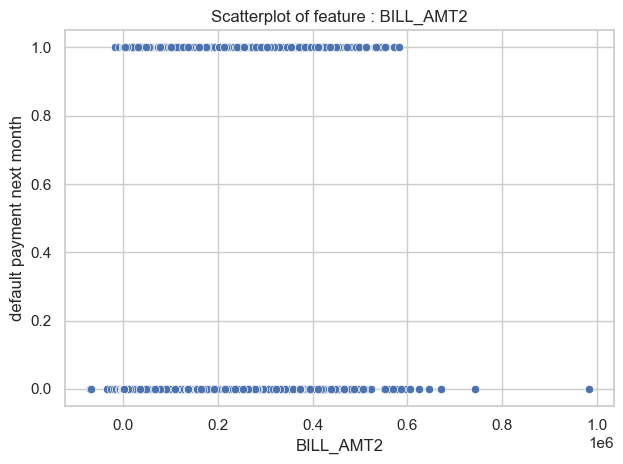

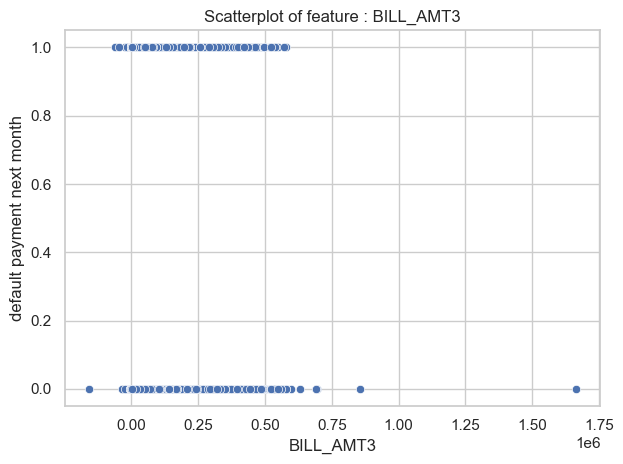

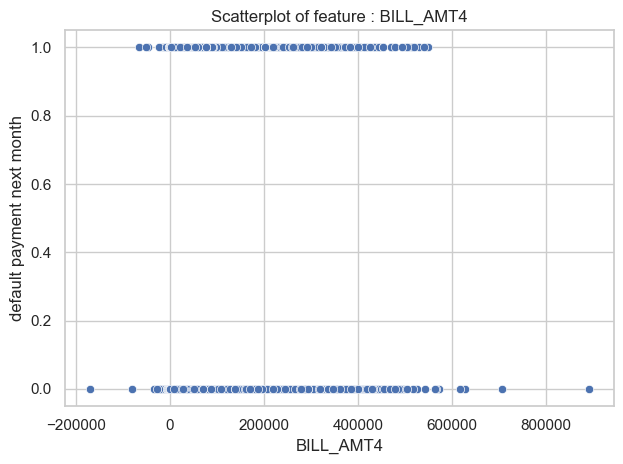

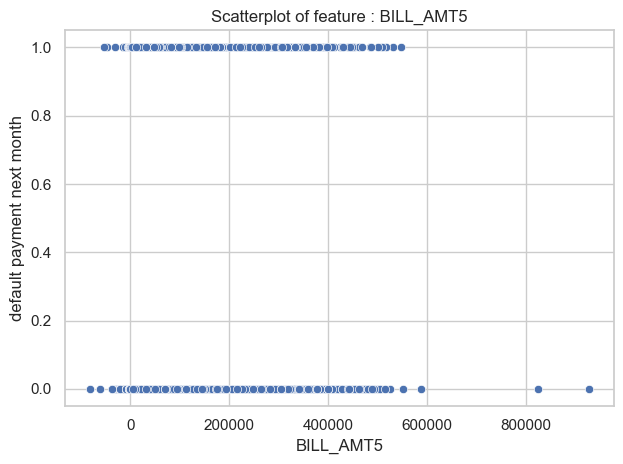

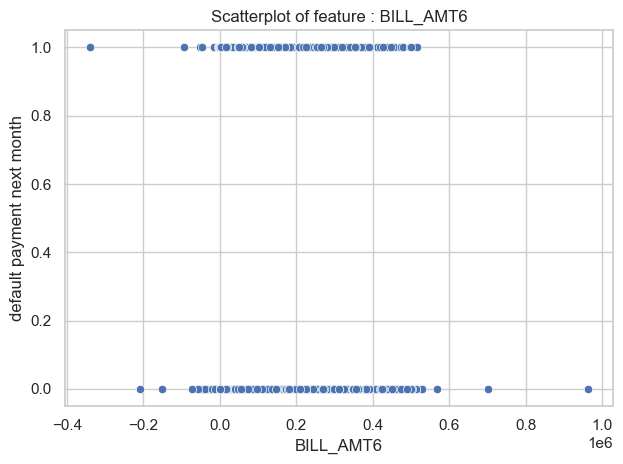

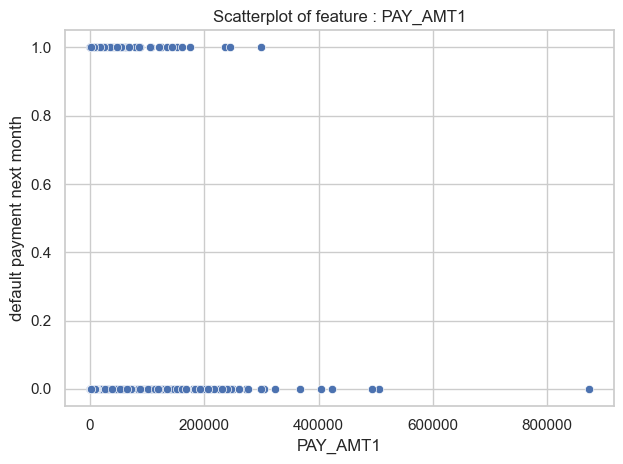

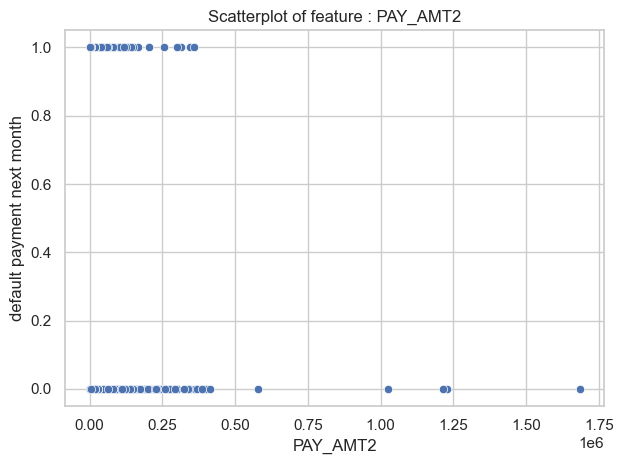

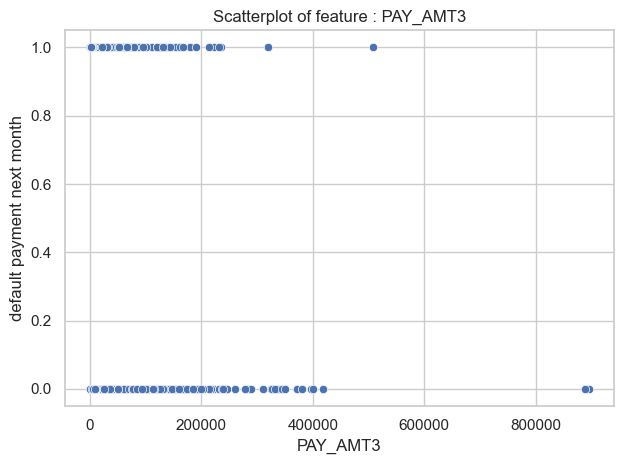

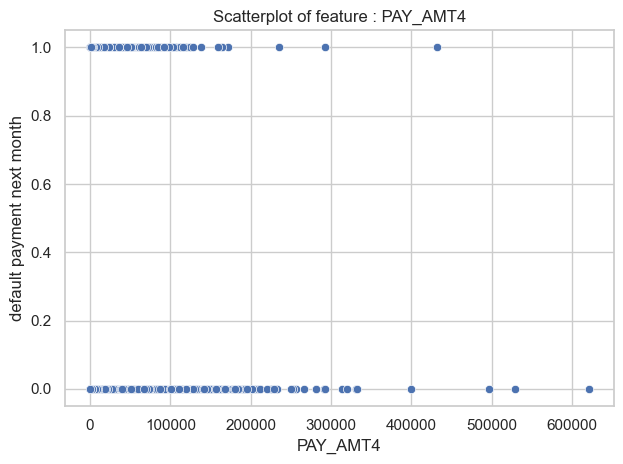

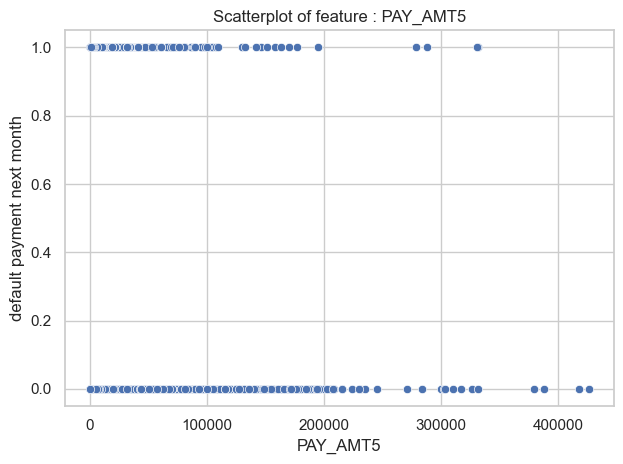

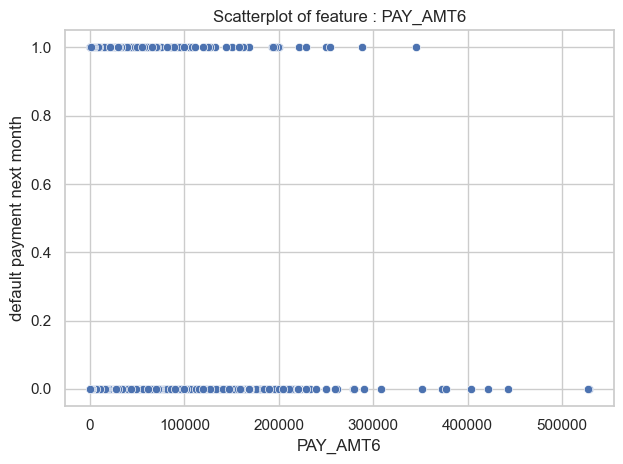

In [89]:
### To display the relation between X values and Y, where Y is tagret value ( default payment next month).
plt.show()

for column in df.columns:
    if column == "default payment next month":
        continue
    sns.scatterplot(data=df, x=column, y="default payment next month")
    plt.title(f"Scatterplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")


### Scale numerical features

In [112]:
'''
LIMIT_BAL (Credit limit)
AGE (Age of the customer)
PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 (Payment status)
BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 (Bill amounts)
PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6 (Payment amounts)
'''

# Scaling Numerical Variables
scaler = StandardScaler()
df[['LIMIT_BAL', 'AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]] = scaler.fit_transform(df[['LIMIT_BAL', 'AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

print(df)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
0          1  -1.136720    2          2         1 -1.246020  1.794564   
1          2  -0.365981    2          2         2 -1.029047 -0.874991   
2          3  -0.597202    2          2         2 -0.161156  0.014861   
3          4  -0.905498    2          2         1  0.164303  0.014861   
4          5  -0.905498    1          2         1  2.334029 -0.874991   
...      ...        ...  ...        ...       ...       ...       ...   
29995  29996   0.404759    1          3         1  0.381275  0.014861   
29996  29997  -0.134759    1          3         2  0.815221 -0.874991   
29997  29998  -1.059646    1          2         2  0.164303  3.574267   
29998  29999  -0.674276    1          3         1  0.598248  0.904712   
29999  30000  -0.905498    1          2         1  1.140680  0.014861   

          PAY_2     PAY_3     PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0      1.782348 -0.696663 -0.666599  ...  -0.6

In [ ]:
#scaled_data=df

### Split the dataset into training and testing sets

In [94]:
X = df.drop('default payment next month', axis=1)  # Independent variables
y = df['default payment next month']               # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24000, 24)
X_test shape: (6000, 24)
y_train shape: (24000,)
y_test shape: (6000,)
